<a href="https://colab.research.google.com/github/hikmatfarhat-ndu/CSC645/blob/master/10sequence_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout,Embedding,LSTM,Dense
print(tf.__version__)

2.3.0


In [2]:
(x_train,y_train),(x_test,y_test)=imdb.load_data()

In [3]:
for i in range(5):
 print(len(x_train[i]),x_train[i][0:10])


218 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
189 [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463]
141 [1, 14, 47, 8, 30, 31, 7, 4, 249, 108]
550 [1, 4, 18609, 16085, 33, 2804, 4, 2040, 432, 111]
147 [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637]


#### START HERE Load and transform the IMDB review sentiment dataset

In [4]:
# load and preprocess the IMDB dataset
num_words=5000
maxlen=300
index_from=3
(x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',num_words=num_words,maxlen=maxlen)



In [5]:
for i in range(4):
 print(len(x_train[i]),x_train[i][0:10])


218 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
189 [1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463]
141 [1, 14, 47, 8, 30, 31, 7, 4, 249, 108]
147 [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637]


In [6]:
x_train = pad_sequences(x_train,maxlen=None,padding='pre',truncating='pre',value=0)
    
x_test =pad_sequences(x_test,maxlen=None,padding='pre',truncating='pre',value=0)

In [7]:
print(x_train.shape)

(19051, 299)


In [8]:
# Load the dataset

#(x_train,y_train),(x_test,y_test)=get_and_pad_imdb_dataset(num_words=num_words,maxlen=300)

In [9]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=5000, index_from=2):
    imdb_word_index = imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [10]:
# Get the word index using get_imdb_word_index()
imdb_word_index=get_imdb_word_index(num_words=num_words)


#### Create a recurrent neural network model

In [11]:
# Get the maximum index value

max_index_value=max(imdb_word_index.values())
embedding_dim=256

In [12]:
model=tf.keras.Sequential()
model.add(Embedding(input_dim=max_index_value+1,output_dim=embedding_dim,mask_zero=True))
model.add(LSTM(units=60))
model.add(Dense(units=1,activation='sigmoid'))    



#### Compile and fit the model

In [13]:
# Compile the model with binary cross-entropy loss

model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [14]:
# Fit the model and save its training history
history=model.fit(x_train,y_train,epochs=3,batch_size=500,validation_data=(x_test,y_test))


Epoch 1/3
39/39 [==============================] - 32s 831ms/step - loss: 0.5515 - accuracy: 0.7220 - val_loss: 0.3585 - val_accuracy: 0.8540
Epoch 2/3
39/39 [==============================] - 31s 801ms/step - loss: 0.2864 - accuracy: 0.8877 - val_loss: 0.3511 - val_accuracy: 0.8609
Epoch 3/3
39/39 [==============================] - 32s 812ms/step - loss: 0.2274 - accuracy: 0.9135 - val_loss: 0.2993 - val_accuracy: 0.8790


In [15]:
model.evaluate(x_test,y_test,verbose=1)
print("done")

608/608 [==============================] - 34s 55ms/step - loss: 0.2993 - accuracy: 0.8790
done


In [21]:
emb=model.layers[0]
lstm=model.layers[1]
dense=model.layers[2]
y=emb(x_train[0:1])
print(x_train[0:1])
print(y)
z=lstm(y)
print(z)
logit=dense(z)
print(logit)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    1   14   22
    16   43  530  973 1622 1385   65  458 4468   66 3941    4  173   36
   256    5   25  100   43  838  112   50  670    2    9   35  480  284
     5  150    4  172  112  167    2  336  385   39    4  172 4536 1111
    17  546   38   13  447    4  192   50   16    6  147 2025   19   14
    22    4 1920 4613  469    4   22   71   87   12   16   43  530   38
    76   15   13 1247    4   22   17  515   17   12   16  626   18    2
     5   62  386   12    8  316    8  106    5    4 2223    2   16  480
    66 3785   33    4  130   12   16   38  619    5   25  124   

#### Plot learning curves

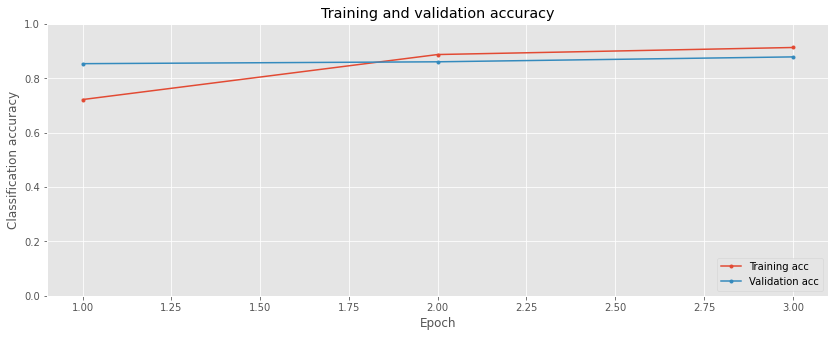

In [17]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [18]:
# View the first test data example sentence
# (invert the word index)
inv_imdb_word_index={val:key for key,val in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_test[0] if index >2]



['james',
 'may',
 'that',
 'all',
 'of',
 'jack',
 'in',
 'in',
 'a',
 'and',
 'use',
 'to',
 'and',
 'us',
 'playing',
 'wrong',
 'and',
 'know',
 'br',
 'cute',
 'cute',
 'cute',
 'in',
 'in',
 'this',
 'made',
 'off',
 'him',
 'quality',
 'any',
 'he',
 'wonderfully',
 'that',
 'all',
 'not',
 'have',
 'be',
 'interesting',
 'throughout',
 'is',
 'off',
 'that',
 'shows',
 'few',
 'is',
 '10',
 'has',
 'a',
 'have',
 "he's",
 'as',
 'down',
 'from',
 'at',
 'are',
 'mother',
 'may',
 'that',
 'of',
 'jack']

In [19]:
# Get the model prediction using model.predict()

model.predict(x_test[None,0,:])

array([[0.14059912]], dtype=float32)

In [20]:
# Get the corresponding label
y_test[0]


0